# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


2024-07-13 06:24:54.883256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 06:24:54.883356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 06:24:55.009061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import and Process Dataset

In [3]:
# Import the dataset
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df['date'] = pd.to_datetime(df['Timestamp'], unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()


# Split Dataset

In [4]:
# Split data into training and test sets
prediction_days = 30
df_train = Real_Price[:len(Real_Price) - prediction_days]
df_test = Real_Price[len(Real_Price) - prediction_days:]


# Preprocess Data

In [5]:
# Data preprocessing
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set) - 1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))


# Build and Train the Model

In [6]:
# Building the RNN model
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size=5, epochs=100)


Epoch 1/100
120/669 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3059

I0000 00:00:1720851919.627830      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


669/669 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1530
Epoch 2/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0094
Epoch 3/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0093
Epoch 4/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0073
Epoch 5/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0058
Epoch 6/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036
Epoch 7/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021
Epoch 8/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012
Epoch 9/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.2794e-04
Epoch 10/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7643e-04
Epoch 11/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6660e-04
Epoch 12/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0097e-04
Epoch 13/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4881e-04
Epoch 14/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8167e-04
Epoch 15/100
669/669 ━━━━━━━━━━

# Make Predictions

In [7]:
# Making predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


# Visualizing Results

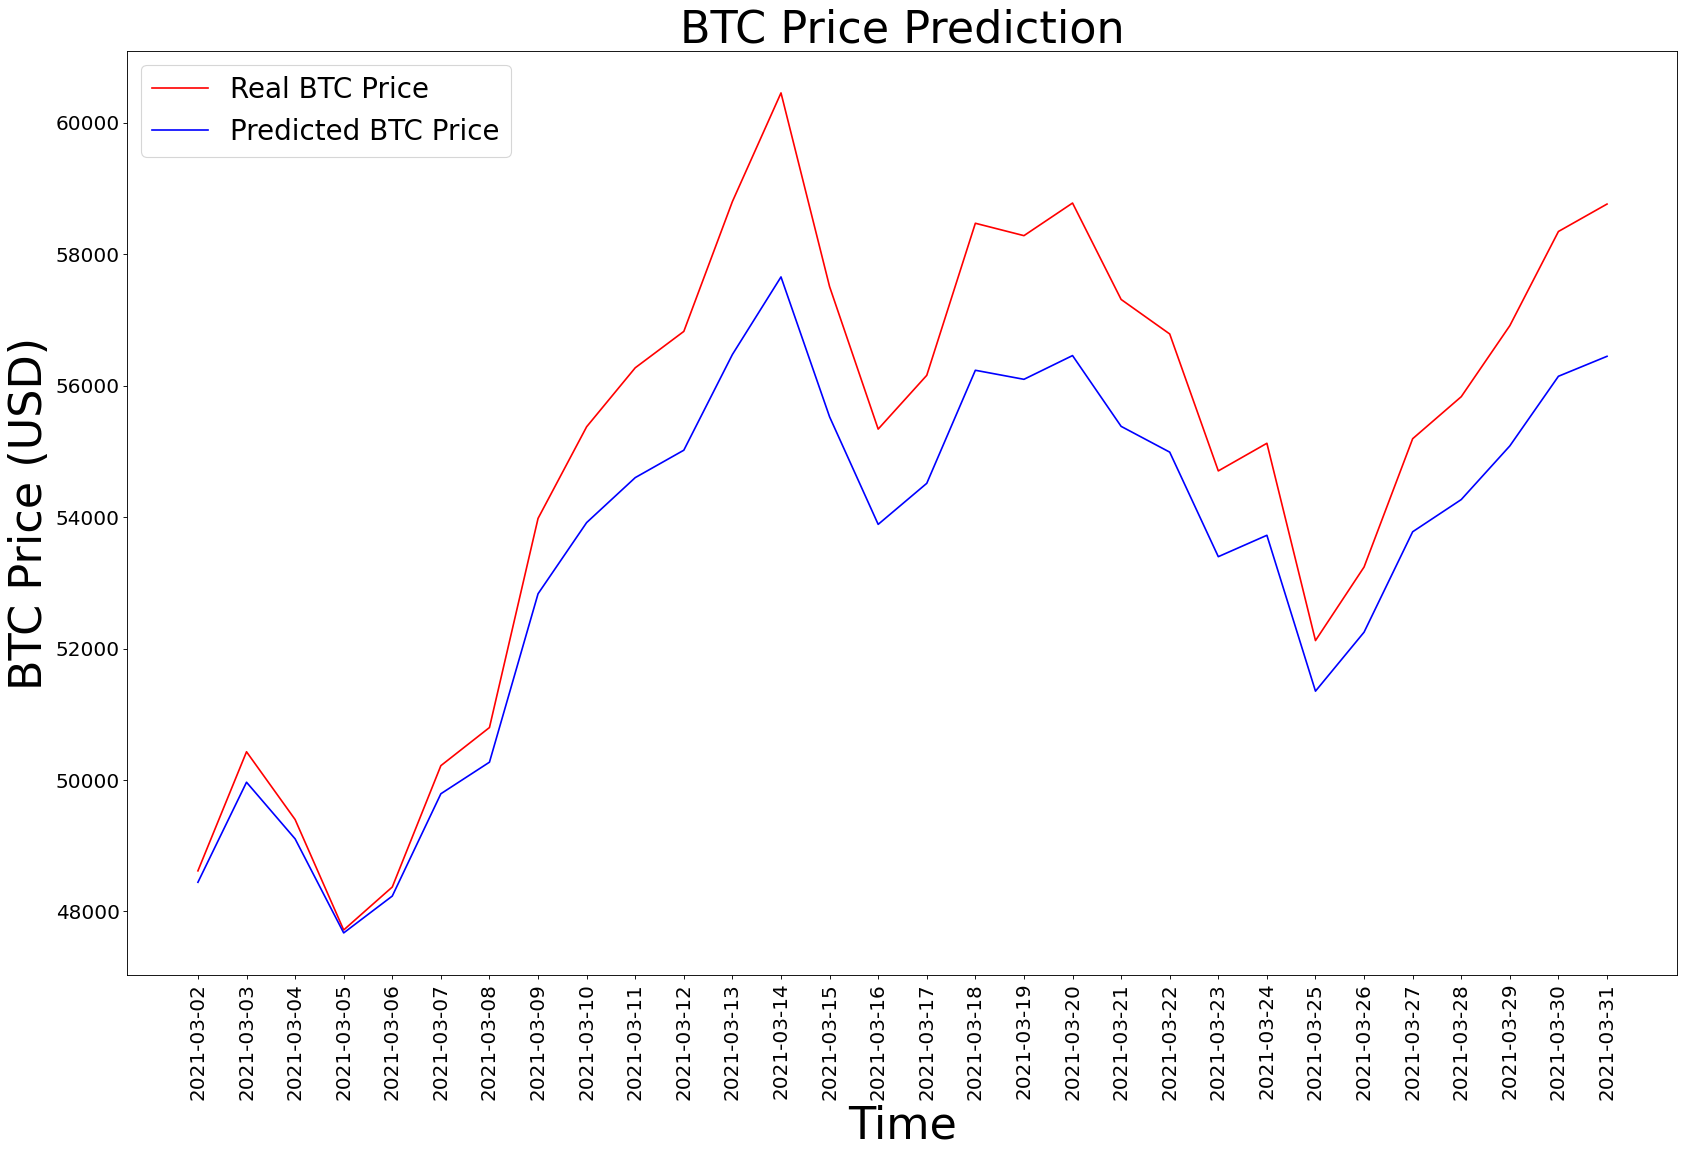

In [8]:
# Visualizing the results
plt.figure(figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color='red', label='Real BTC Price')
plt.plot(predicted_BTC_price, color='blue', label='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x = df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation='vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price (USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()
